# Import

In [12]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import math
from matplotlib.pyplot import figure
import xlrd
import pingouin as pg
import seaborn as sns

# Data

In [13]:
satelit_data=(r'..\data\AgERA5_4params_graz.csv')
local_data=(r'..\data\new_5sta(DNOWS)_3com(NO2,PM10K,O3)_year2010_TemporalDummies_Ox_holidays_meteo.csv')
traffic_data=(r'..\data\traffic_KP.xlsx')
df_satelit= pd.read_csv(satelit_data,index_col = 0)
df_local = pd.read_csv(local_data,index_col = 0)
df_local.index = pd.to_datetime(df_local.index)
df_satelit.index = pd.to_datetime(df_satelit.index)
df_ulice = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='Sheet1', index_col=0)
df_ulice_podaci = pd.read_excel(traffic_data, engine='openpyxl', sheet_name='traffic_data_containsNA_KP', index_col=0)
df_ulice_podaci.index = pd.to_datetime(df_ulice_podaci.index)
df_local=df_local['2018-01-01':'2020-03-15']
df_ulice_podaci=df_ulice_podaci['2018-01-01':'2020-03-15']
df_satelit=df_satelit['2018-01-01':'2020-03-15']

# Nan

In [14]:
print(df_ulice_podaci.isnull().sum())

# popunjavnaje nan vrijednosti s mean za svaku kolonu

df_ulice_podaci = df_ulice_podaci.fillna(df_ulice_podaci.mean())

8010_208      2
8020_110      2
8020_119      3
8020_122      2
8053_111      2
8010_205      2
8010_209      2
8010_213      2
8010_214      2
8020_102      5
8020_103      2
8020_107     45
8041_218      2
8041_221      2
8045_203    155
8051_101      2
dtype: int64


# Odjavjanje prometa za svaku mjernu tocku

In [15]:
Postaje=df_ulice.Reference_station
Udaljenost = df_ulice['Distance to ref']

In [16]:
Nord= []
DonBosco=[]
Sud= []
West= []
Ost= []
Postaje=df_ulice.Reference_station
mjerne_tocke = ['Nord','DonBosco','Sud','West','Ost']
for value,index,udaljenost in zip(Postaje,Postaje.index,Udaljenost):
    if value == 'Nord':
        Nord.append(index)
    if value == 'DonBosco':
        DonBosco.append(index)
    if value == 'Sud':
        Sud.append(index)
    if value == 'West':
        West.append(index)
    if value == 'Ost':
        Ost.append(index)
        
dictonary = {'Nord':Nord,'DonBosco':DonBosco,'Sud':Sud,'West':West,'Ost':Ost}

In [17]:
N_PM10=['N_PM10K','D_PM10K','S_PM10K','W_PM10K','O_PM10K']

In [18]:
strings = ['N_','D_','S_','W_','O_']

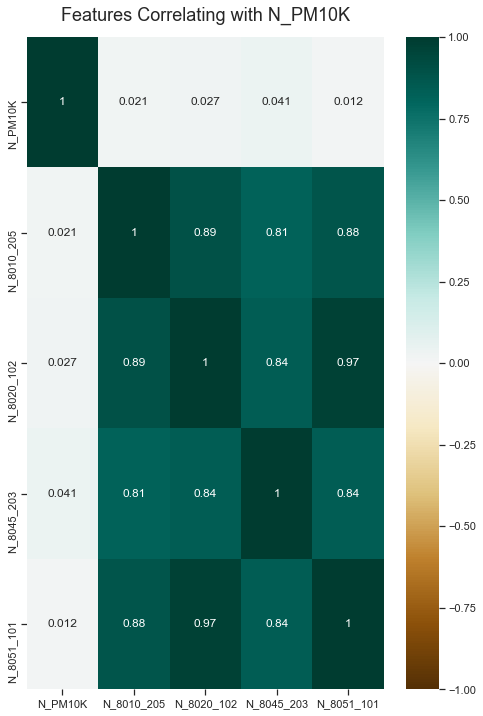

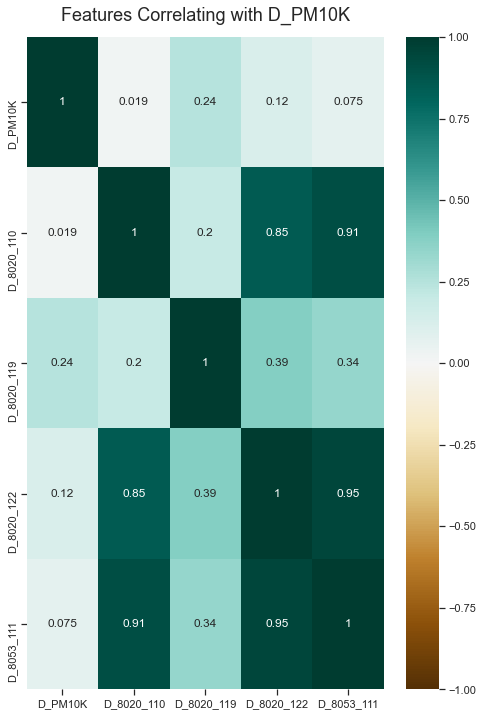

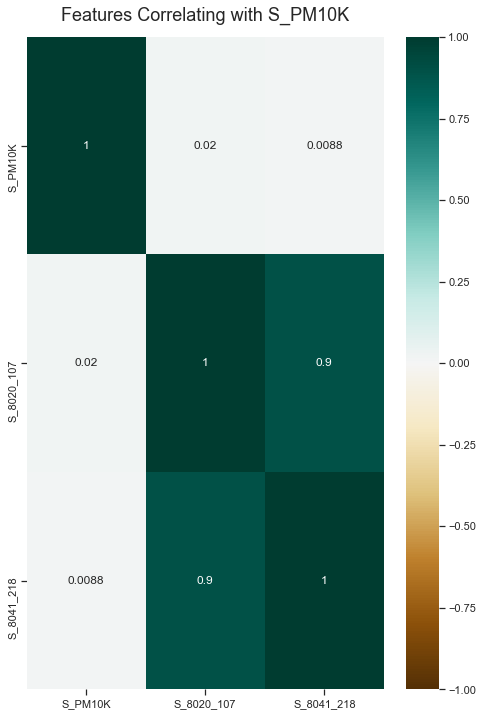

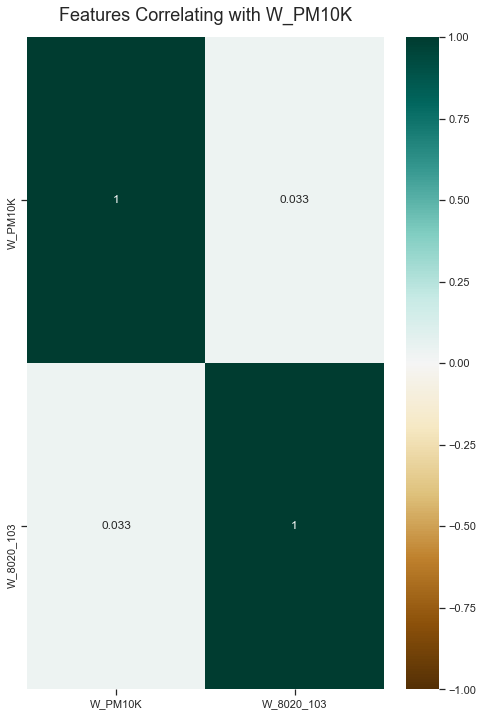

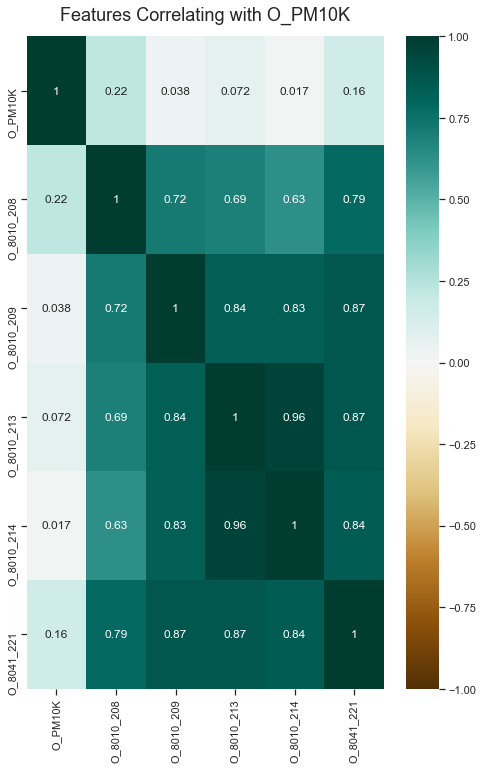

In [20]:
sns.set_theme(style="ticks")
for PM10,value,string in zip(N_PM10,dictonary.values(),strings):

    x = df_local[PM10]
    y = df_ulice_podaci[value]
    data = pd.concat([x, y],axis = 1, join='inner')
    plt.figure(figsize=(8, 12))
    my_new_list = [string + x for x in value]
    ma_new_list = my_new_list.insert(0,PM10)
    heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG',xticklabels=my_new_list, yticklabels=my_new_list,)
    heatmap.set_title(f'Features Correlating with {PM10}', fontdict={'fontsize':18}, pad=16);        
    